In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer
from google.colab import files
uploaded = files.upload()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
from wordcloud import WordCloud
import io

Saving spam.csv to spam (10).csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['spam.csv'].decode('latin-1')))

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.drop (['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.columns = (['label', 'data'])
df

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#create binary labels
df['b_labels'] = df['label'].map({'ham' : 0, 'spam' : 1})

df

,label,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
Y = df['b_labels'].to_numpy()

Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#count/ calculating features in 2 ways to compare

count_vectorizer = CountVectorizer(decode_error='ignore')
X1 = count_vectorizer.fit_transform(df['data'])

count_vectorizer = TfidfVectorizer(decode_error='ignore')
X2 = count_vectorizer.fit_transform(df['data'])

In [ ]:
#spit up the data

Xtrain1, Xtest1, Ytrain, Ytest = train_test_split(X1, Y, test_size=0.33)
Xtrain2, Xtest2, Ytrain, Ytest = train_test_split(X2, Y, test_size=0.33)

In [ ]:
model = MultinomialNB()
model.fit(Xtrain1, Ytrain)

print("train score", model.score(Xtrain1, Ytrain))
print("test score", model.score(Xtest1, Ytest))

model.fit(Xtrain2, Ytrain)

print("train score", model.score(Xtrain2, Ytrain))
print("test score", model.score(Xtest2, Ytest))

train score 0.8821323332440396
test score 0.8412180532898315
train score 0.9624966514867399
test score 0.9613920609026645


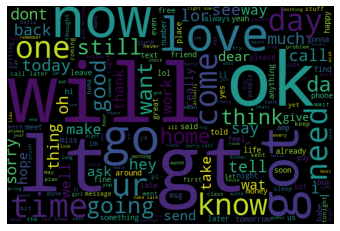

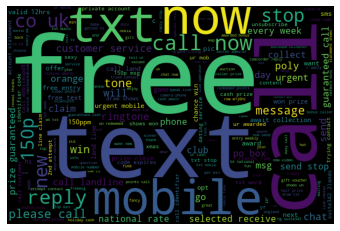

In [ ]:
#visualization WordCloud

def visualize(label):
  words = ''
  for msg in df[df['label'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('ham')
visualize('spam')

In [ ]:
#Prediction

df['prediction'] = model.predict(X2)

predict_spam = df[(df['prediction'] == 0) & (df['b_labels'] == 1)]['data']

for msg in predict_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg Why haven't y

In [ ]:
predict_ham = df[(df['prediction'] == 1) & (df['b_labels'] == 0)]['data']

for msg in predict_ham:
  print(msg)



In [ ]:
df

,label,data,b_labels,prediction
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,1
5568,ham,Will Ì_ b going to esplanade fr home?,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0


In [ ]:
score = 0
wrong_score = 0
for i in range(df.shape[0]):
  if df.iloc[i, 2] == 1 and df.iloc[i, 3] == 0:
    print(df.iloc[i , :])
    wrong_score +=1
  if df.iloc[i, 2] == 1 and df.iloc[i, 3] == 1:
    score += 1

label                                                      spam
data          FreeMsg Hey there darling it's been 3 week's n...
b_labels                                                      1
prediction                                                    0
Name: 5, dtype: object
label                                                      spam
data          XXXMobileMovieClub: To use your credit, click ...
b_labels                                                      1
prediction                                                    0
Name: 15, dtype: object
label                                                      spam
data          Thanks for your subscription to Ringtone UK yo...
b_labels                                                      1
prediction                                                    0
Name: 34, dtype: object
label                                                      spam
data          SMS. ac Sptv: The New Jersey Devils and the De...
b_labels                         

In [ ]:
h_score = 0
w_hscore = 0
for i in range(df.shape[0]):
  if df.iloc[i, 2] == 0 and df.iloc[i, 3] == 1 :
    w_hscore += 1
    print(df.iloc[i , :])
  if df.iloc[i, 2] == 0 and df.iloc[i, 3] == 0 :
    h_score += 1

In [ ]:
print("SPAM Score")
print("----------------")
print("SCORE : ", score)
print("Wrong SCORE : ", wrong_score)

print("")
print("Ham Score")
print("----------------")
print("SCORE : ", h_score)
print("Wrong SCORE : ", w_hscore)

SPAM Score
----------------
SCORE :  536
Wrong SCORE :  211

Ham Score
----------------
SCORE :  4825
Wrong SCORE :  0


In [ ]:
#check by pandas

df.loc[(df['b_labels'] == 1) & (df['prediction'] == 0)]

,label,data,b_labels,prediction
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,0
15,spam,"XXXMobileMovieClub: To use your credit, click ...",1,0
34,spam,Thanks for your subscription to Ringtone UK yo...,1,0
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...,1,0
56,spam,Congrats! 1 year special cinema pass for 2 is ...,1,0
...,...,...,...,...
5449,spam,"Latest News! Police station toilet stolen, cop...",1,0
5456,spam,\For the most sparkling shopping breaks from 4...,1,0
5492,spam,Marvel Mobile Play the official Ultimate Spide...,1,0
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,0
